In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yurimaguas pe
illoqqortoormiut gl
coihaique cl
ushuaia ar
formoso do araguaia br
guerrero negro mx
zhuzhou cn
kalemie cd
butaritari ki
cockburn town tc
akcaabat tr
meyungs pw
sorland no
hua hin th
ugoofaaru mv
broken hill au
ushuaia ar
doha kw
batemans bay au
punta arenas cl
zaraza ve
longyearbyen sj
samalaeulu ws
langham ca
vaini to
saint-francois gp
provideniya ru
punta arenas cl
meyungs pw
urumqi cn
madang pg
puerto ayora ec
sentyabrskiy ru
saskylakh ru
ilulissat gl
asfi ma
bredasdorp za
lagoa pt
tuatapere nz
puerto ayora ec
barentsburg sj
aykhal ru
atuona pf
bluff nz
hilo us
kushiro jp
lazaro cardenas mx
deer lake ca
rikitea pf
castro cl
cape town za
barrow us
falkenstein de
kahului us
salem us
tanjong sepat my
new norfolk au
goundi td
marsh harbour bs
port alfred za
mataura pf
hambantota lk
esperance au
yarim ye
kapaa us
eureka us
barahona do
nipawin ca
te anau nz
hithadhoo mv
port alfred za
cape town za
vaini to
taolanaro mg
gamba ga
ushuaia ar
victoria sc
charlottetown ca
komsom

vila velha br
tiksi ru
alofi nu
hofn is
horsham au
kartuzy pl
aswan eg
belushya guba ru
kapaa us
belushya guba ru
bethel us
hobart au
busselton au
lompoc us
new norfolk au
kununurra au
mosquera co
punta arenas cl
punta arenas cl
natal br
amderma ru
saldanha za
krasnoselkup ru
dong hoi vn
nikolskoye ru
touros br
mount gambier au
saint-philippe re
miraflores co
banda aceh id
georgetown sh
lorengau pg
doha kw
neiafu to
kapaa us
ilulissat gl
kuche cn
goderich sl
vaini to
vao nc
misratah ly
hirara jp
east london za
punta arenas cl
upernavik gl
noumea nc
rikitea pf
jumla np
yellowknife ca
hermanus za
belushya guba ru
charagua bo
port alfred za
busselton au
mitzic ga
manzhouli cn
paita pe
barrow us
saint-philippe re
chapais ca
ushuaia ar
hobart au
rikitea pf
georgetown sh
victor harbor au
ambilobe mg
nikolskoye ru
sveti nikole mk
hasaki jp
barentsburg sj
talara pe
busselton au
nikolskoye ru
taolanaro mg
gaziantep tr
rikitea pf
vaini to
barbastro es
katsuura jp
esperance au
ushuaia ar
rikitea 

puerto ayora ec
sola vu
carnarvon au
namatanai pg
saint-philippe re
east london za
progreso mx
grand river south east mu
rikitea pf
bathsheba bb
ushuaia ar
cowra au
batagay-alyta ru
rikitea pf
kaeo nz
vaitupu wf
nemuro jp
feijo br
taolanaro mg
mahebourg mu
saint-philippe re
uri in
bilma ne
attawapiskat ca
mataura pf
ushuaia ar
beringovskiy ru
clyde river ca
linares cl
lebu cl
poum nc
attawapiskat ca
bethel us
palmer us
punta arenas cl
carnarvon au
saskylakh ru
dickinson us
vaini to
monterey us
bredasdorp za
busselton au
bluff nz
koungou yt
hobart au
codrington ag
mar del plata ar
rikitea pf
busselton au
baculin ph
castro cl
albany au
kapaa us
ushuaia ar
albany au
rikitea pf
isangel vu
mataura pf
taolanaro mg
busselton au
ushuaia ar
iquique cl
pouebo nc
rikitea pf
fier al
new norfolk au
kavaratti in
bonavista ca
new norfolk au
grand river south east mu
busselton au
rikitea pf
qaanaaq gl
manokwari id
haysville us
longyearbyen sj
atuona pf
hilo us
longyearbyen sj


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc817d961e6353eef67b0eaf62922dc5


In [9]:
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Processing Record 1 of Set 1 | yurimaguas
City not found. Skipping...
Processing Record 2 of Set 1 | illoqqortoormiut
Processing Record 3 of Set 1 | coihaique
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | formoso do araguaia
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | zhuzhou
Processing Record 8 of Set 1 | kalemie
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | akcaabat
City not found. Skipping...
Processing Record 12 of Set 1 | meyungs
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | hua hin
Processing Record 15 of Set 1 | ugoofaaru
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | doha
Processing Record 18 of Set 1 | batemans bay
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | zaraza
Processing Record 21 of Set 1 | longyearbyen
City not found. Skipping.

Processing Record 38 of Set 4 | roald
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | groningen
Processing Record 43 of Set 4 | robertson
Processing Record 44 of Set 4 | januaria
Processing Record 45 of Set 4 | keroka
City not found. Skipping...
Processing Record 46 of Set 4 | ust-kamchatsk
Processing Record 47 of Set 4 | suntar
Processing Record 48 of Set 4 | preobrazheniye
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | surgut
Processing Record 2 of Set 5 | chone
Processing Record 3 of Set 5 | sao domingos do maranhao
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | impfondo
Processing Record 6 of Set 5 | gedo
Processing Record 7 of Set 5 | mecca
Processing Record 8 of Set 5 | poum
Processing Record 9 of Set 5 | dharchula
Processing Record 10 of Set 5 | altay
Processing Recor

City not found. Skipping...
Processing Record 26 of Set 8 | hihifo
Processing Record 27 of Set 8 | chokurdakh
Processing Record 28 of Set 8 | alofi
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | kartuzy
Processing Record 31 of Set 8 | aswan
City not found. Skipping...
Processing Record 32 of Set 8 | belushya guba
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | mosquera
Processing Record 36 of Set 8 | natal
Processing Record 37 of Set 8 | krasnoselkup
Processing Record 38 of Set 8 | dong hoi
Processing Record 39 of Set 8 | miraflores
Processing Record 40 of Set 8 | banda aceh
Processing Record 41 of Set 8 | neiafu
City not found. Skipping...
Processing Record 42 of Set 8 | kuche
Processing Record 43 of Set 8 | goderich
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | misratah
Processing Record 46 of Set 8 | hirara
Processing Record 47 of Set 8 | noumea
Processing Record 48 of Set

Processing Record 15 of Set 12 | sovetskiy
Processing Record 16 of Set 12 | eunice
Processing Record 17 of Set 12 | presidente medici
Processing Record 18 of Set 12 | mangalagiri
Processing Record 19 of Set 12 | ghanzi
Processing Record 20 of Set 12 | balykshi
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | elko
Processing Record 23 of Set 12 | pesaro
Processing Record 24 of Set 12 | belyy yar
Processing Record 25 of Set 12 | mayo
Processing Record 26 of Set 12 | sisimiut
Processing Record 27 of Set 12 | bonoua
Processing Record 28 of Set 12 | ngong
Processing Record 29 of Set 12 | batagay-alyta
Processing Record 30 of Set 12 | xining
Processing Record 31 of Set 12 | daryapur
Processing Record 32 of Set 12 | mahenge
Processing Record 33 of Set 12 | choma
Processing Record 34 of Set 12 | balod
Processing Record 35 of Set 12 | adeje
City not found. Skipping...
Processing Record 36 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 37 o

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yurimaguas,-5.9000,-76.0833,74.10,95,91,1.21,PE,2022-02-22 12:43:34
1,Coihaique,-45.5752,-72.0662,48.31,75,0,0.00,CL,2022-02-22 12:43:36
2,Ushuaia,-54.8000,-68.3000,49.66,87,100,17.27,AR,2022-02-22 12:43:37
3,Guerrero Negro,27.9769,-114.0611,59.05,62,100,15.23,MX,2022-02-22 12:43:38
4,Zhuzhou,27.8333,113.1500,33.93,100,100,3.38,CN,2022-02-22 12:43:39
5,Kalemie,-5.9475,29.1947,80.15,70,95,9.17,CD,2022-02-22 12:43:40
6,Butaritari,3.0707,172.7902,80.83,83,100,18.01,KI,2022-02-22 12:43:41
7,Cockburn Town,21.4612,-71.1419,77.36,72,0,19.53,TC,2022-02-22 12:41:11
8,Akcaabat,41.0212,39.5715,55.27,67,0,1.14,TR,2022-02-22 12:43:42
9,Sorland,67.6670,12.6934,31.86,66,6,11.68,NO,2022-02-22 12:43:43


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
ordered_city_data_df = city_data_df[new_column_order]
ordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yurimaguas,PE,2022-02-22 12:43:34,-5.9000,-76.0833,74.10,95,91,1.21
1,Coihaique,CL,2022-02-22 12:43:36,-45.5752,-72.0662,48.31,75,0,0.00
2,Ushuaia,AR,2022-02-22 12:43:37,-54.8000,-68.3000,49.66,87,100,17.27
3,Guerrero Negro,MX,2022-02-22 12:43:38,27.9769,-114.0611,59.05,62,100,15.23
4,Zhuzhou,CN,2022-02-22 12:43:39,27.8333,113.1500,33.93,100,100,3.38
5,Kalemie,CD,2022-02-22 12:43:40,-5.9475,29.1947,80.15,70,95,9.17
6,Butaritari,KI,2022-02-22 12:43:41,3.0707,172.7902,80.83,83,100,18.01
7,Cockburn Town,TC,2022-02-22 12:41:11,21.4612,-71.1419,77.36,72,0,19.53
8,Akcaabat,TR,2022-02-22 12:43:42,41.0212,39.5715,55.27,67,0,1.14
9,Sorland,NO,2022-02-22 12:43:43,67.6670,12.6934,31.86,66,6,11.68


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

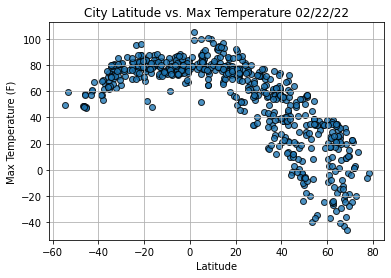

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

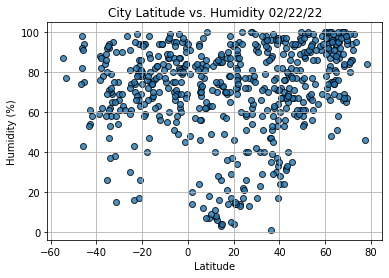

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

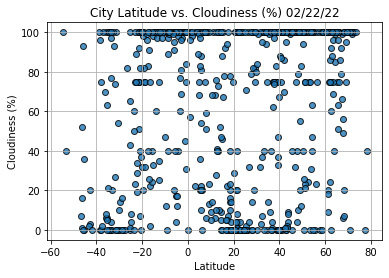

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

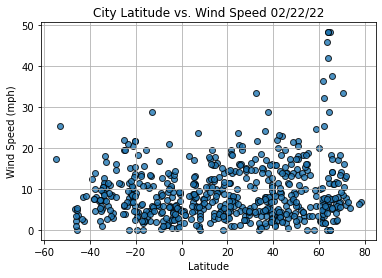

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()